In [62]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
from copy import deepcopy
from glob import glob
sys.path.insert(0,"/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.insert(0,"/scratch/group/csce435-f24/thicket")


pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [63]:

tk = th.Thicket.from_caliperreader(glob("../Cali_Files/Column/*/*.cali"))


(2/2) Creating Thicket: 100%|██████████| 10/10 [00:00<00:00, 24.65it/s]


In [64]:
print(tk.tree(metric_column="Avg time/rank"))


  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

16.129 main
├─ 0.000 MPI_Init
└─ 15.807 data_init_runtime
   ├─ 0.006 MPI_Comm_dup
   ├─ 0.000 MPI_Finalize
   ├─ 0.000 MPI_Finalized
   ├─ 0.000 MPI_Initialized
   ├─ 0.012 correctness_check
   │  ├─ 0.000 MPI_Bcast
   │  ├─ 0.000 MPI_Recv
   │  ├─ 0.002 MPI_Reduce
   │  └─ 0.000 MPI_Send
   └─ 15.779 sort_runtime
      ├─ 2.080 MPI_Barrier
      ├─ 0.002 MPI_Gather
      ├─ 7.338 comm
      │  ├─ 0.000 comm_send_shift
      │  │  └─ 0.000 MPI_Send
      │  ├─ 3.678 comm_transpose
      │  │  └─ 3.171 MPI_Sendrecv
      │  └─ 3.661 comm_untranspose
      │     └─ 3.096 MPI_Sendrecv
      └─ 0.007 comp
         ├─ 0.001 comp_copy_transpose
         ├─ 0.001 comp_copy_untranspose
         ├─ 0.002 comp_expand_vector
         ├─ 0.001 comp_reshape
         ├─ 0.001 comp_reshape_final
         └─ 0.000 co

In [66]:
tk.metadata.head(5)


,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,scalability,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1489053738,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,column-random-p2-a18.cali,true,true,true,true,1729652348,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 18, random, column]",c,column,mpi,unsigned int,4,262144,random,2,strong,25,handwritten
1820951200,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,column-perturbed-p2-a16.cali,true,true,true,true,1729652468,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 16, perturbed, column]",c,column,mpi,unsigned int,4,65536,perturbed,2,strong,25,handwritten
1887878202,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,column-perturbed-p2-a20.cali,true,true,true,true,1729652641,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 20, perturbed, column]",c,column,mpi,unsigned int,4,1048576,perturbed,2,strong,25,handwritten
1988919915,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,column-sorted-p2-a16.cali,true,true,true,true,1729652441,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 16, sorted, column]",c,column,mpi,unsigned int,4,65536,sorted,2,strong,25,handwritten
2422811540,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,column-random-p2-a20.cali,true,true,true,true,1729652348,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 20, random, column]",c,column,mpi,unsigned int,4,1048576,random,2,strong,25,handwritten


In [67]:
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("num_procs")
tk.dataframe = tk.dataframe.reset_index().set_index(["node", "input_size", "input_type", "num_procs"]).sort_index()

In [68]:
tk.dataframe.head(5)


profile  \
node                                 input_size input_type num_procs               
{'name': 'main', 'type': 'function'} 65536      perturbed  2          1820951200   
                                                random     2          3077823023   
                                                reverse    2          2935839286   
                                                sorted     2          1988919915   
                                     262144     perturbed  2          4258846316   

                                                                      nid  \
node                                 input_size input_type num_procs        
{'name': 'main', 'type': 'function'} 65536      perturbed  2          1.0   
                                                random     2          1.0   
                                                reverse    2          1.0   
                                                sorted     2          1.0   
                                     262144     perturbed  2          1.0   

                                                                       spot.channel  \
node                                 input_size input_type num_procs                  
{'name': 'main', 'type': 'function'} 65536      perturbed  2          regionprofile   
                                                random     2          regionprofile   
                                                reverse    2          regionprofile   
                                                sorted     2          regionprofile   
                                     262144     perturbed  2          regionprofile   

                                                                      Min time/rank  \
node                                 input_size input_type num_procs                  
{'name': 'main', 'type': 'function'} 65536      perturbed  2               3.139533   
                                                random     2               4.221171   
                                                reverse    2               4.361523   
                                                sorted     2               3.210500   
                                     262144     perturbed  2              12.468353   

                                                                      Max time/rank  \
node                                 input_size input_type num_procs                  
{'name': 'main', 'type': 'function'} 65536      perturbed  2               3.139729   
                                                random     2               4.221616   
                                                reverse    2               4.361527   
                                                sorted     2               3.210861   
                                     262144     perturbed  2              12.469823   

                                                                      Avg time/rank  \
node                                 input_size input_type num_procs                  
{'name': 'main', 'type': 'function'} 65536      perturbed  2               3.139631   
                                                random     2               4.221393   
                                                reverse    2               4.361525   
                                                sorted     2               3.210681   
                                     262144     perturbed  2              12.469088   

                                                                      Total time  \
node                                 input_size input_type num_procs               
{'name': 'main', 'type': 'function'} 65536      perturbed  2            6.279262   
                                                random     2            8.442787   
                                                reverse    2            8.723051   
                                                sorted     2            6.421361   


In [69]:
plt.rcParams.update({"font.size": 20})
def plot_mpl(pd_series, colors, markers, title, xlabel, ylabel, output_file_path):
    # convert to data_frame
    data_frame = pd_series.unstack(level="num_procs")
    line_names = data_frame.index.to_list()
    # configure plot
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    # plot lines
    data_sets = []
    x_values = data_frame.keys().tolist()
    y_values = data_frame.values.tolist() # 2D array where each row represent a line
    for i in range(len(line_names)):
        s = ax.scatter(x_values, y_values[i], c=colors[i], marker=markers[i], s=256, alpha=0.75) # plot points
        ax.plot(x_values, y_values[i], c=colors[i]) # plot line
        data_sets.append(s)
    # configure legends, title, and labels
    ax.legend(tuple(data_sets), tuple(line_names))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # output
    fig.savefig(output_file_path)
    plt.show()
    return fig, ax  

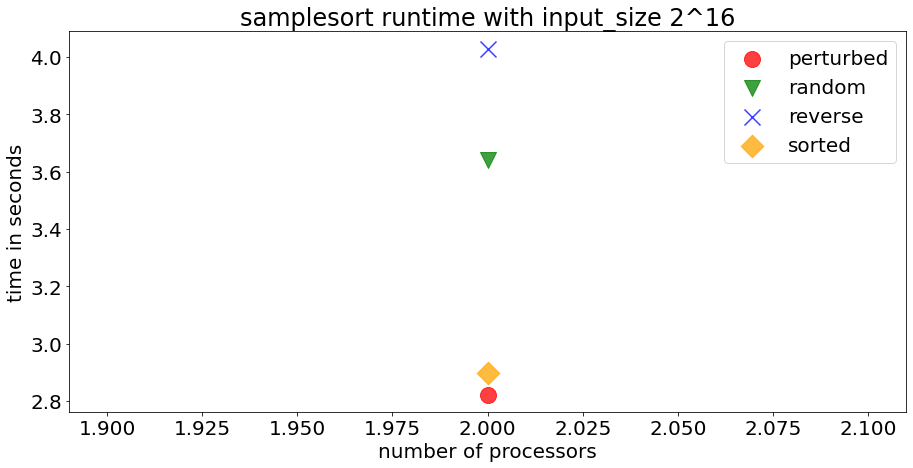

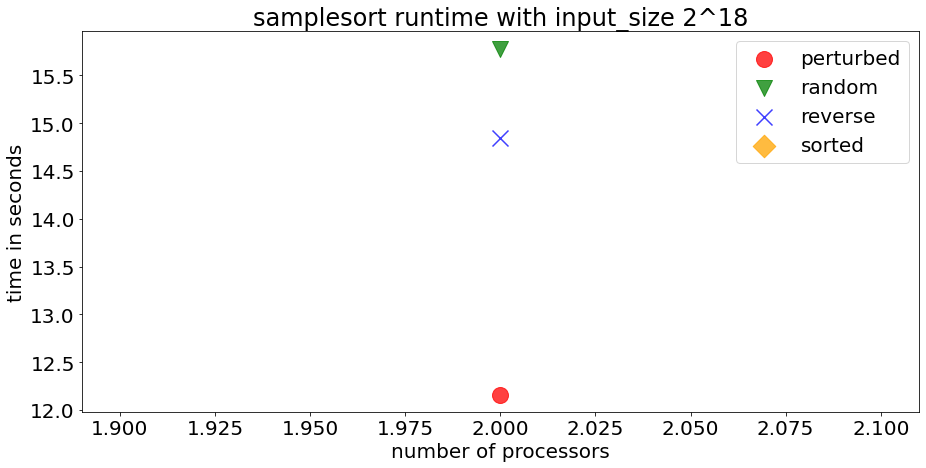

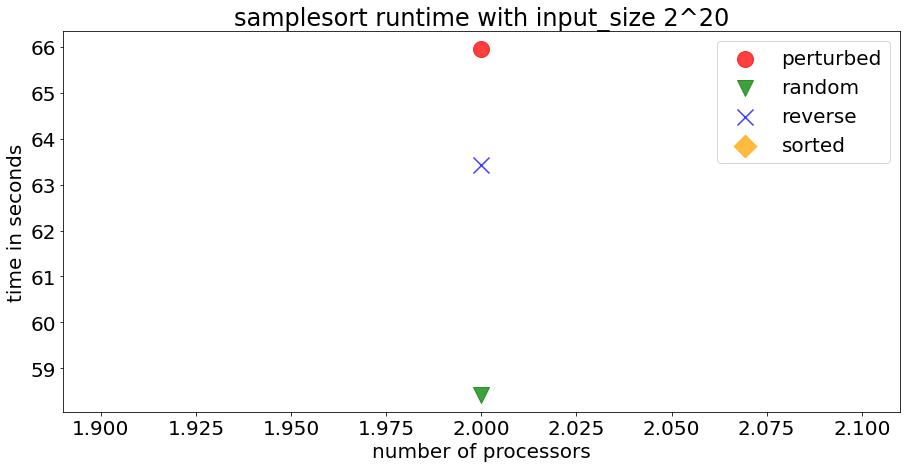

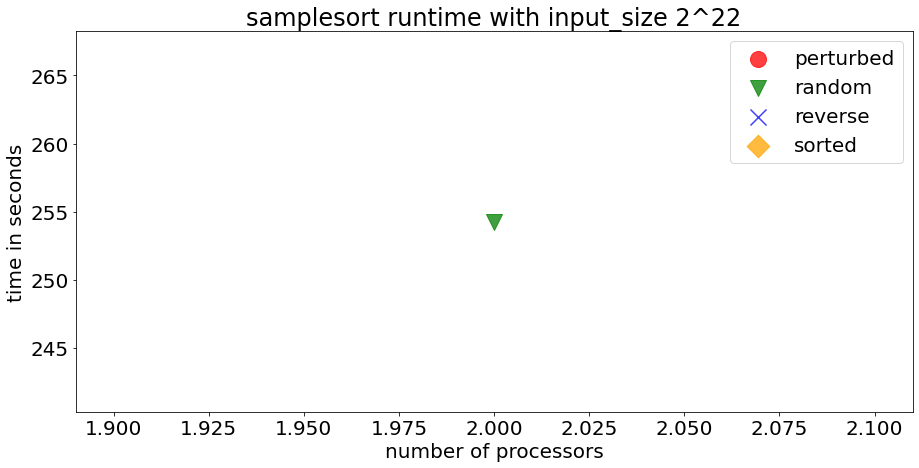

In [70]:
for node in tk.graph.traverse():
    node_name = node.frame["name"]
    if (node_name == "sort_runtime"):
        input_size_frame = tk.dataframe.loc[node, "Avg time/rank"].unstack("input_size")
        for input_size in input_size_frame.keys():
            data_series = input_size_frame[input_size]
            plot_mpl(data_series, 
                ["red", "green", "blue", "orange"], ['o', 'v', 'x', 'D'], 
                "samplesort runtime with input_size 2^{}".format(int(math.log2(input_size))), "number of processors", "time in seconds",
                "../Plots/ColumnSort_Plots/columnsort-runtime-strong-{}.png".format(int(math.log2(input_size)))
            )